In [2]:
from matplotlib import pyplot as pl
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
non_ringed_curves = np.loadtxt('non-ringed-shuffled-normalized-curves.txt')
np.nan_to_num(non_ringed_curves, copy=False)

ringed_curves = np.loadtxt('ringed-shuffled-normalized-curves.txt')
np.nan_to_num(ringed_curves, copy=False)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
rae_model = keras.models.load_model('trained_model')

2023-08-09 03:21:43.771421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 03:21:44.202098: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22301 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:73:00.0, compute capability: 8.6


In [5]:
index_2_thirds = int((2/3)*non_ringed_curves.shape[0])
test_non_ringed_curves = non_ringed_curves.reshape((non_ringed_curves.shape[0],non_ringed_curves.shape[1], 1))[index_2_thirds:]
test_ringed_curves = ringed_curves.reshape((ringed_curves.shape[0], ringed_curves.shape[1], 1))


In [6]:
predictions_non_ringed_curves = rae_model.predict(test_non_ringed_curves)
predictions_ringed_curves = rae_model.predict(test_ringed_curves)

   1/2039 [..............................] - ETA: 1:00:19

2023-08-09 03:21:52.455897: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-08-09 03:21:52.618612: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


17/17 [==============================] - 0s 12ms/step


In [112]:
#¿COMO LOS GUARDO? ¿LAS PREDICCIONES SIQUIERA SE DEBEN GUARDAR?

#np.savetxt('non-ringed-shuffled-normalized-test-predictions.txt', predictions_non_ringed_curves)
#np.savetxt('ringed-shuffled-normalized-predictions.txt', predictions_ringed_curves)

In [7]:
mean_predictions_non_ringed_curves = np.mean(predictions_non_ringed_curves, axis=2)
mean_predictions_ringed_curves = np.mean(predictions_ringed_curves, axis=2)

std_predictions_non_ringed_curves = np.std(predictions_non_ringed_curves, axis=2)
std_predictions_ringed_curves = np.std(predictions_ringed_curves, axis=2)

In [8]:
non_ringed_test_medians = np.loadtxt('non-ringed-shuffled-medians.txt')[index_2_thirds:]
non_ringed_test_stds = np.loadtxt('non-ringed-shuffled-stds.txt')[index_2_thirds:]
non_ringed_test_ids = np.loadtxt('non-ringed-shuffled-ids.txt', str)[index_2_thirds:]

ringed_medians = np.loadtxt('ringed-shuffled-medians.txt')
ringed_stds = np.loadtxt('ringed-shuffled-stds.txt')
ringed_ids = np.loadtxt('ringed-shuffled-ids.txt', str)


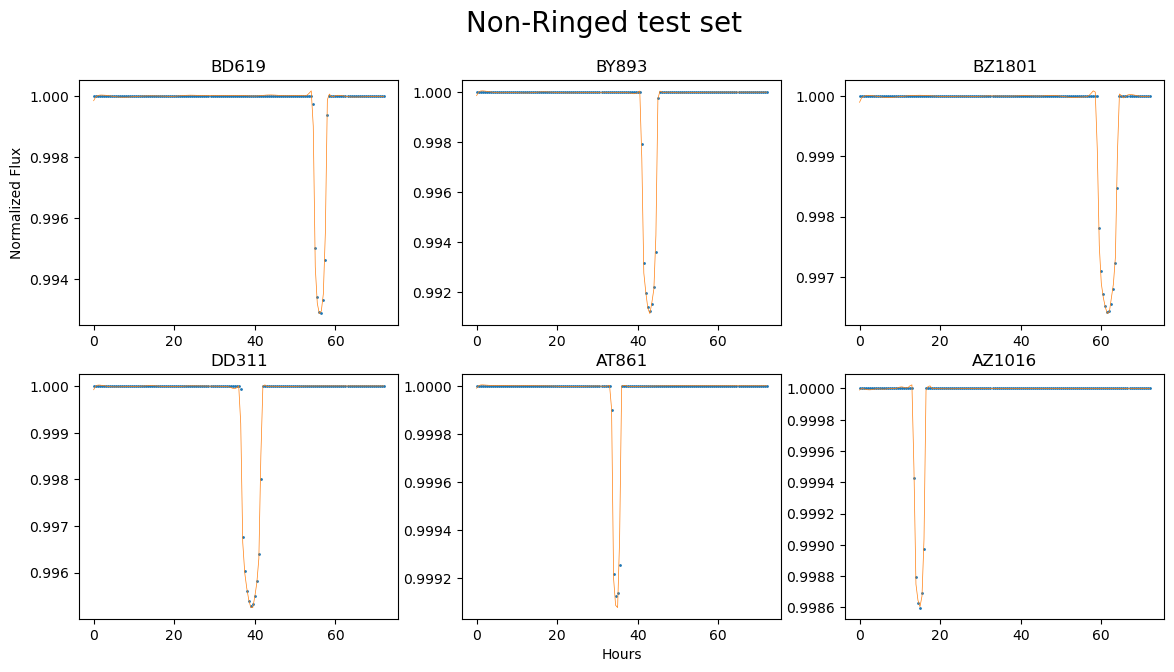

In [9]:
non_ringed_fig, non_ringed_axes = pl.subplots(2, 3)
for i in range(6):
    non_ringed_real = (test_non_ringed_curves[i]*non_ringed_test_stds[i]) + non_ringed_test_medians[i]
    non_ringed_prediction = (mean_predictions_non_ringed_curves[i]*non_ringed_test_stds[i]) + non_ringed_test_medians[i]
    if i ==0:
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_real,  '.', label='Original', markersize=2)
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction,  label='Prediction', lw=0.5)
        non_ringed_axes[0, i].set_title(non_ringed_test_ids[i])
        non_ringed_axes[0, i].set_ylabel('Normalized Flux')
        
    
    if i<3 and i!=0:
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[0, i].set_title(non_ringed_test_ids[i])
        
    if i==4:
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[1, i-3].set_title(non_ringed_test_ids[i])
        non_ringed_axes[1, i-3].set_xlabel('Hours')
        
    if i>=3 and i!=4:
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[1, i-3].set_title(non_ringed_test_ids[i])
    
non_ringed_fig.suptitle('Non-Ringed test set', fontsize=20)
non_ringed_fig.set_size_inches(14, 7)
non_ringed_fig.savefig('Figs/non-ringed-reconstructions.png')
non_ringed_fig.show()

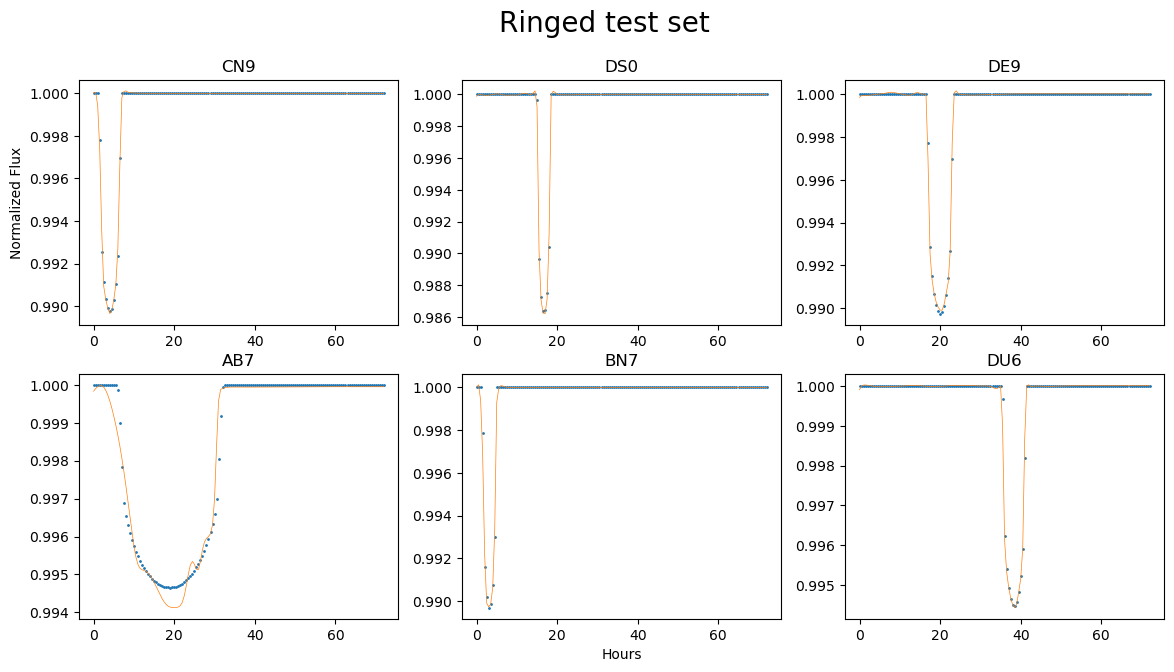

In [10]:
ringed_fig, ringed_axes = pl.subplots(2, 3)
for i in range(6):
    ringed_real = (test_ringed_curves[i]*ringed_stds[i]) + ringed_medians[i]
    ringed_prediction = (mean_predictions_ringed_curves[i]*ringed_stds[i]) + ringed_medians[i]
    if i ==0:
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_real,  '.', label='Original', markersize=2)
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_prediction,  label='Prediction', lw=0.5)
        ringed_axes[0, i].set_title(ringed_ids[i])
        ringed_axes[0, i].set_ylabel('Normalized Flux')
        
    
    if i<3 and i!=0:
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[0, i].set_title(ringed_ids[i])
        
    if i==4:
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[1, i-3].set_title(ringed_ids[i])
        ringed_axes[1, i-3].set_xlabel('Hours')
        
    if i>=3 and i!=4:
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[1, i-3].set_title(ringed_ids[i])
    
ringed_fig.suptitle('Ringed test set', fontsize=20)
ringed_fig.set_size_inches(14, 7)
ringed_fig.savefig('Figs/ringed-reconstructions.png')
ringed_fig.show()

In [11]:
non_ringed_rec_err = np.sum(np.abs(test_non_ringed_curves[:, :, 0]-mean_predictions_non_ringed_curves),axis=1)
ringed_rec_err = np.sum(np.abs(test_ringed_curves[:, :, 0]-mean_predictions_ringed_curves),axis=1)

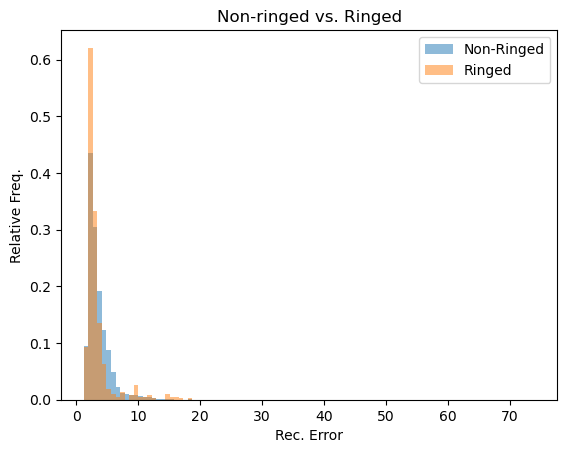

In [12]:
rec_err_common_range = [np.min([np.nanmin(non_ringed_rec_err), np.nanmin(ringed_rec_err)]), np.nanmax([np.max(non_ringed_rec_err), np.nanmax(ringed_rec_err)])]

pl.hist(non_ringed_rec_err, alpha=0.5, label='Non-Ringed', bins=100, density=True, range=rec_err_common_range)
pl.hist(ringed_rec_err, alpha=0.5, label='Ringed', bins=100, density=True, range=rec_err_common_range)
pl.legend()
pl.xlabel('Rec. Error')
pl.ylabel('Relative Freq.')
pl.title('Non-ringed vs. Ringed')
pl.savefig('Figs/rec-err.png')
pl.show()

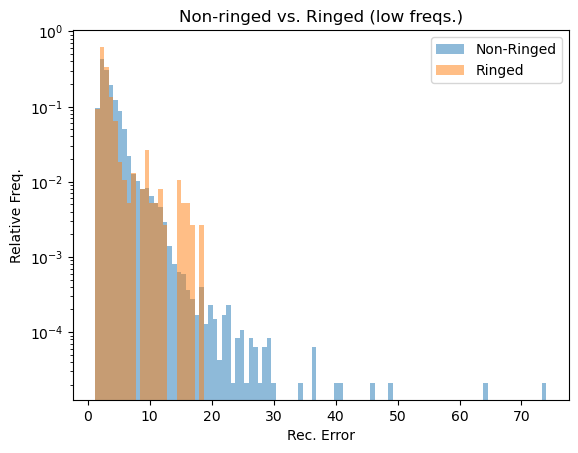

In [13]:
rec_err_common_range = [np.min([np.nanmin(non_ringed_rec_err), np.nanmin(ringed_rec_err)]), np.nanmax([np.max(non_ringed_rec_err), np.nanmax(ringed_rec_err)])]

pl.hist(non_ringed_rec_err, alpha=0.5, label='Non-Ringed', bins=100, density=True, range=rec_err_common_range)
pl.hist(ringed_rec_err, alpha=0.5, label='Ringed', bins=100, density=True, range=rec_err_common_range)
pl.legend()
pl.xlabel('Rec. Error')
pl.ylabel('Relative Freq.')
pl.yscale('log')
pl.title('Non-ringed vs. Ringed (low freqs.)')
pl.savefig('Figs/rec-err-low-freq.png')
pl.show()

In [14]:
std_predictions_non_ringed_curves.shape

(65230, 145)

In [15]:
mean_MSWD_non_ringed = []

for i in range(predictions_non_ringed_curves.shape[0]):
    MSWD_non_ringed=[]
    for j in range(predictions_non_ringed_curves.shape[1]):
        MSWD_non_ringed.append((1/(predictions_non_ringed_curves.shape[1]-1))*np.sum(((predictions_non_ringed_curves[i, j] - mean_predictions_non_ringed_curves[i])**2)/std_predictions_non_ringed_curves[i]))
    mean_MSWD_non_ringed.append(sum(MSWD_non_ringed)/predictions_non_ringed_curves.shape[1])

In [16]:
mean_MSWD_ringed = []

for i in range(predictions_ringed_curves.shape[0]):
    MSWD_ringed=[]
    for j in range(predictions_ringed_curves.shape[1]):
        MSWD_ringed.append((1/(predictions_ringed_curves.shape[1]-1))*np.sum(((predictions_ringed_curves[i, j] - mean_predictions_ringed_curves[i])**2)/std_predictions_ringed_curves[i]))
    mean_MSWD_ringed.append(sum(MSWD_ringed)/predictions_ringed_curves.shape[1])

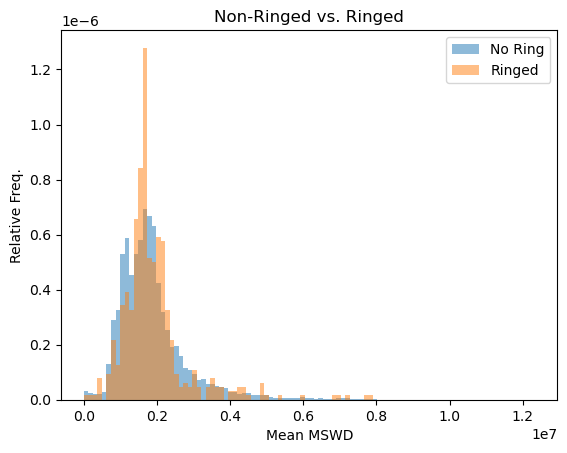

In [17]:
mean_MSWD_common_range = [np.min([np.nanmin(mean_MSWD_ringed), np.nanmin(mean_MSWD_non_ringed)]), np.nanmax([np.max(mean_MSWD_ringed), np.nanmax(mean_MSWD_non_ringed)])]

pl.hist(mean_MSWD_non_ringed, label='No Ring', bins=100, range=mean_MSWD_common_range, density=True, alpha=0.5)
pl.hist(mean_MSWD_ringed, label='Ringed', bins=100, range=mean_MSWD_common_range, density=True, alpha=0.5)
pl.legend()
pl.xlabel('Mean MSWD')
pl.ylabel('Relative Freq.')
pl.title('Non-Ringed vs. Ringed')
pl.savefig('Figs/mean-MSWD.png')
pl.show()

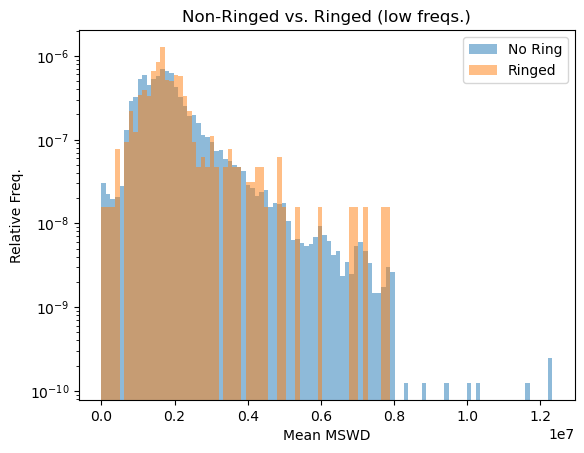

In [18]:
pl.hist(mean_MSWD_non_ringed, label='No Ring', bins=100, range=mean_MSWD_common_range, density=True, alpha=0.5)
pl.hist(mean_MSWD_ringed, label='Ringed', bins=100, range=mean_MSWD_common_range, density=True, alpha=0.5)
pl.legend()
pl.xlabel('Mean MSWD')
pl.ylabel('Relative Freq.')
pl.yscale('log')
pl.title('Non-Ringed vs. Ringed (low freqs.)')
pl.savefig('Figs/mean-MSWD-low-freqs.png')
pl.show()

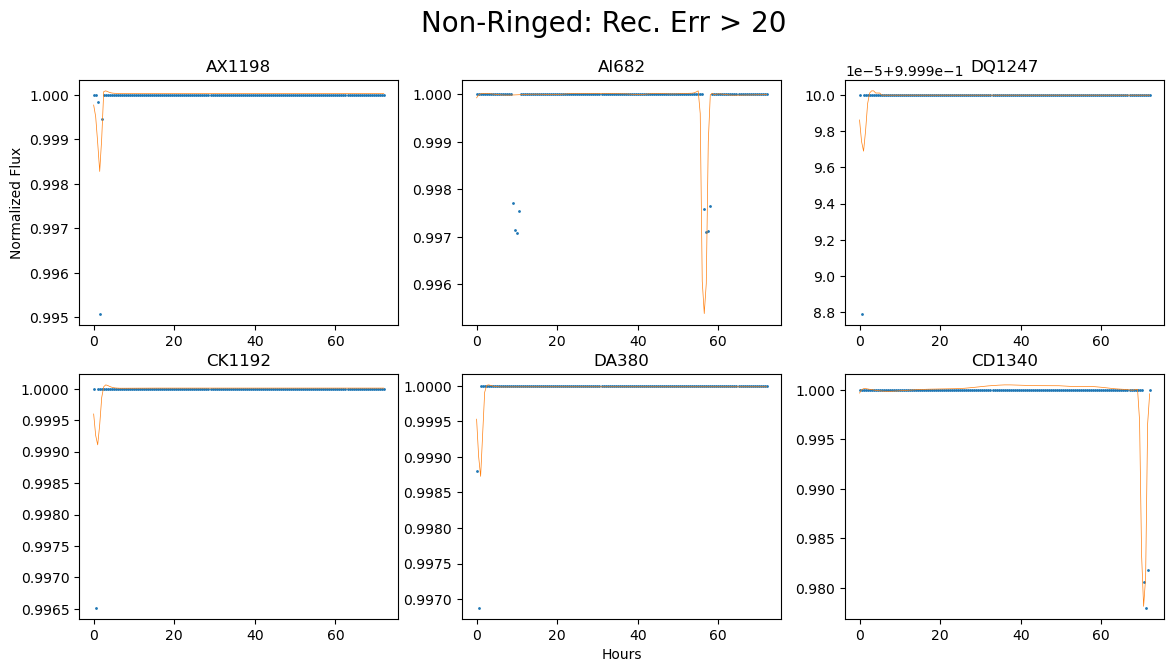

In [19]:
###Plotting some of the worst reconstructions according to Rec. Err.

non_ringed_bad_rec_err_mask = (non_ringed_rec_err > 20)

non_ringed_fig, non_ringed_axes = pl.subplots(2, 3)
for i in range(6):
    non_ringed_real = (test_non_ringed_curves[non_ringed_bad_rec_err_mask][i]*non_ringed_test_stds[non_ringed_bad_rec_err_mask][i]) + non_ringed_test_medians[non_ringed_bad_rec_err_mask][i]
    non_ringed_prediction = (mean_predictions_non_ringed_curves[non_ringed_bad_rec_err_mask][i]*non_ringed_test_stds[non_ringed_bad_rec_err_mask][i]) + non_ringed_test_medians[non_ringed_bad_rec_err_mask][i]
    if i ==0:
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_real,  '.', label='Original', markersize=2)
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction,  label='Prediction', lw=0.5)
        non_ringed_axes[0, i].set_title(non_ringed_test_ids[non_ringed_bad_rec_err_mask][i])
        non_ringed_axes[0, i].set_ylabel('Normalized Flux')
        
    
    if i<3 and i!=0:
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[0, i].set_title(non_ringed_test_ids[non_ringed_bad_rec_err_mask][i])
        
    if i==4:
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[1, i-3].set_title(non_ringed_test_ids[non_ringed_bad_rec_err_mask][i])
        non_ringed_axes[1, i-3].set_xlabel('Hours')
        
    if i>=3 and i!=4:
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[1, i-3].set_title(non_ringed_test_ids[non_ringed_bad_rec_err_mask][i])
    
non_ringed_fig.suptitle('Non-Ringed: Rec. Err > 20', fontsize=20)
non_ringed_fig.set_size_inches(14, 7)
non_ringed_fig.savefig('Figs/non-ringed-bad-rec-err.png')
non_ringed_fig.show()

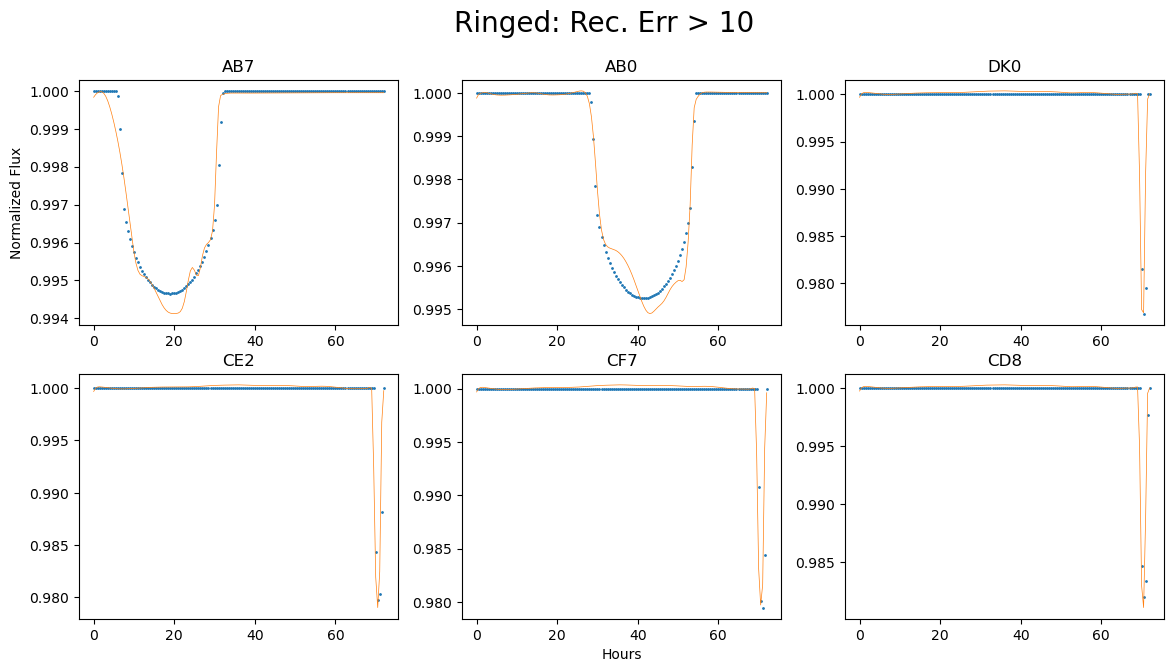

In [20]:

ringed_bad_rec_err_mask = (ringed_rec_err > 10)

ringed_fig, ringed_axes = pl.subplots(2, 3)
for i in range(6):
    ringed_real = (test_ringed_curves[ringed_bad_rec_err_mask][i]*ringed_stds[ringed_bad_rec_err_mask][i]) + ringed_medians[ringed_bad_rec_err_mask][i]
    ringed_prediction = (mean_predictions_ringed_curves[ringed_bad_rec_err_mask][i]*ringed_stds[ringed_bad_rec_err_mask][i]) + ringed_medians[ringed_bad_rec_err_mask][i]
    if i ==0:
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_real,  '.', label='Original', markersize=2)
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_prediction,  label='Prediction', lw=0.5)
        ringed_axes[0, i].set_title(ringed_ids[ringed_bad_rec_err_mask][i])
        ringed_axes[0, i].set_ylabel('Normalized Flux')
        
    
    if i<3 and i!=0:
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[0, i].set_title(ringed_ids[ringed_bad_rec_err_mask][i])
        
    if i==4:
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[1, i-3].set_title(ringed_ids[ringed_bad_rec_err_mask][i])
        ringed_axes[1, i-3].set_xlabel('Hours')
        
    if i>=3 and i!=4:
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[1, i-3].set_title(ringed_ids[ringed_bad_rec_err_mask][i])
    
ringed_fig.suptitle('Ringed: Rec. Err > 10', fontsize=20)
ringed_fig.set_size_inches(14, 7)
ringed_fig.savefig('Figs/ringed-bad-rec-err.png')
ringed_fig.show()

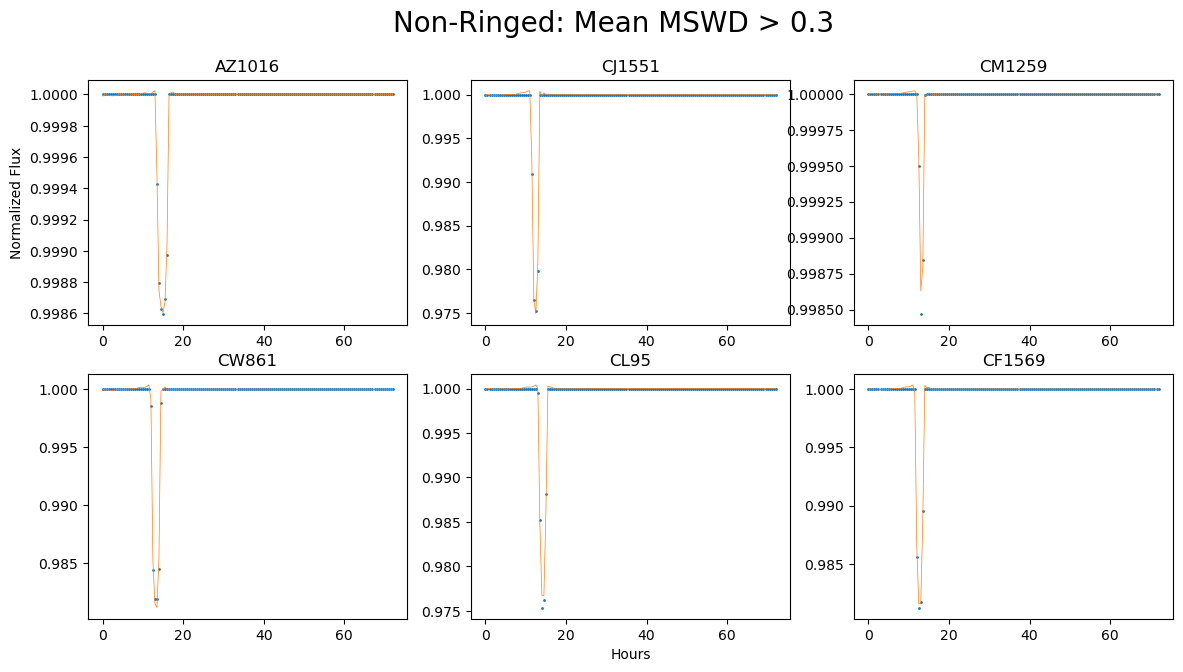

In [21]:
###Plotting some of the worst reconstructions according to Mean MSWD.

non_ringed_bad_mean_MSWD_mask = (np.array(mean_MSWD_non_ringed) > 0.3*1e7)

non_ringed_fig, non_ringed_axes = pl.subplots(2, 3)
for i in range(6):
    non_ringed_real = (test_non_ringed_curves[non_ringed_bad_mean_MSWD_mask][i]*non_ringed_test_stds[non_ringed_bad_mean_MSWD_mask][i]) + non_ringed_test_medians[non_ringed_bad_mean_MSWD_mask][i]
    non_ringed_prediction = (mean_predictions_non_ringed_curves[non_ringed_bad_mean_MSWD_mask][i]*non_ringed_test_stds[non_ringed_bad_mean_MSWD_mask][i]) + non_ringed_test_medians[non_ringed_bad_mean_MSWD_mask][i]
    if i ==0:
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_real,  '.', label='Original', markersize=2)
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction,  label='Prediction', lw=0.5)
        non_ringed_axes[0, i].set_title(non_ringed_test_ids[non_ringed_bad_mean_MSWD_mask][i])
        non_ringed_axes[0, i].set_ylabel('Normalized Flux')
        
    
    if i<3 and i!=0:
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[0, i].set_title(non_ringed_test_ids[non_ringed_bad_mean_MSWD_mask][i])
        
    if i==4:
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[1, i-3].set_title(non_ringed_test_ids[non_ringed_bad_mean_MSWD_mask][i])
        non_ringed_axes[1, i-3].set_xlabel('Hours')
        
    if i>=3 and i!=4:
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_real, '.', markersize=2)
        non_ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,non_ringed_prediction, lw=0.5)
        non_ringed_axes[1, i-3].set_title(non_ringed_test_ids[non_ringed_bad_mean_MSWD_mask][i])
    
non_ringed_fig.suptitle('Non-Ringed: Mean MSWD > 0.3', fontsize=20)
non_ringed_fig.set_size_inches(14, 7)
non_ringed_fig.savefig('Figs/non-ringed-bad-mean-MSWD.png')
non_ringed_fig.show()

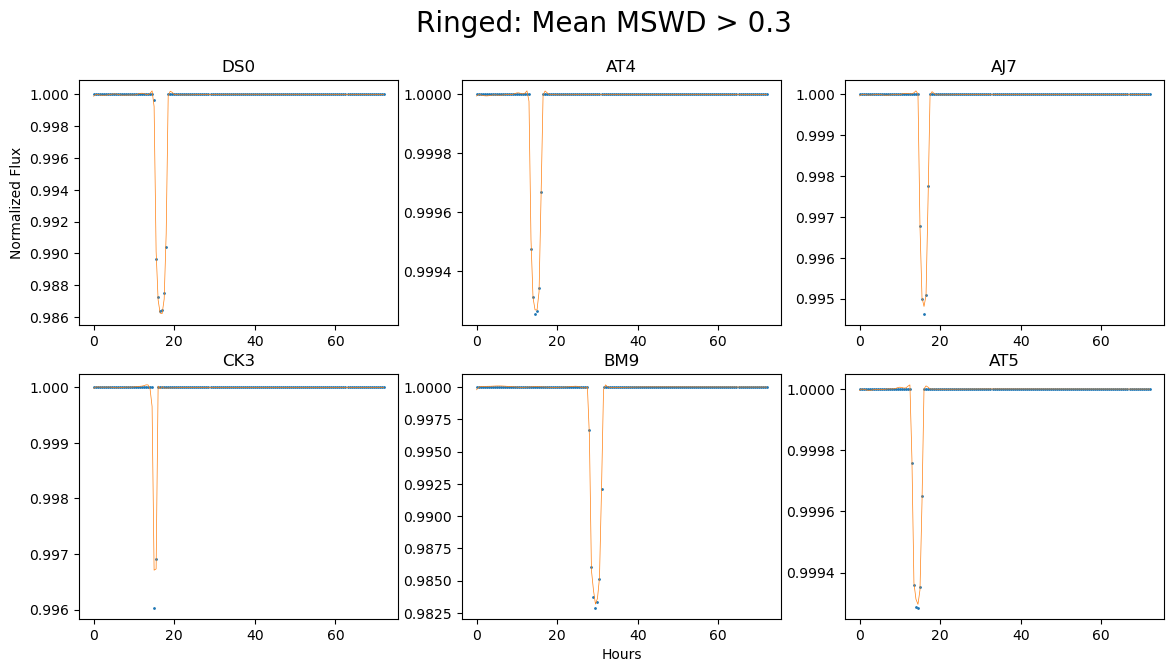

In [22]:

ringed_bad_mean_MSWD_mask = (np.array(mean_MSWD_ringed) > 0.3*1e7)

ringed_fig, ringed_axes = pl.subplots(2, 3)
for i in range(6):
    ringed_real = (test_ringed_curves[ringed_bad_mean_MSWD_mask][i]*ringed_stds[ringed_bad_mean_MSWD_mask][i]) + ringed_medians[ringed_bad_mean_MSWD_mask][i]
    ringed_prediction = (mean_predictions_ringed_curves[ringed_bad_mean_MSWD_mask][i]*ringed_stds[ringed_bad_mean_MSWD_mask][i]) + ringed_medians[ringed_bad_mean_MSWD_mask][i]
    if i ==0:
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_real,  '.', label='Original', markersize=2)
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_prediction,  label='Prediction', lw=0.5)
        ringed_axes[0, i].set_title(ringed_ids[ringed_bad_mean_MSWD_mask][i])
        ringed_axes[0, i].set_ylabel('Normalized Flux')
        
    
    if i<3 and i!=0:
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[0, i].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[0, i].set_title(ringed_ids[ringed_bad_mean_MSWD_mask][i])
        
    if i==4:
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[1, i-3].set_title(ringed_ids[ringed_bad_mean_MSWD_mask][i])
        ringed_axes[1, i-3].set_xlabel('Hours')
        
    if i>=3 and i!=4:
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_real, '.', markersize=2)
        ringed_axes[1, i-3].plot(np.linspace(0, 144, 145)/2,ringed_prediction, lw=0.5)
        ringed_axes[1, i-3].set_title(ringed_ids[ringed_bad_mean_MSWD_mask][i])
    
ringed_fig.suptitle('Ringed: Mean MSWD > 0.3', fontsize=20)
ringed_fig.set_size_inches(14, 7)
ringed_fig.savefig('Figs/ringed-bad-mean-MSWD.png')
ringed_fig.show()

In [86]:
non_ringed_parameters = pd.read_csv('../../Datasets/non-ringed-parameters.csv', index_col='Unnamed: 0')
ringed_parameters = pd.read_csv('../../Datasets/ringed-parameters.csv', index_col='Unnamed: 0')


In [84]:
non_ringed_durations = non_ringed_parameters['pl_trandur'].values
non_ringed_transit_masks = np.loadtxt('../../Datasets/non-ringed-transit-masks.txt', int).astype(bool)
non_ringed_shuffled_indices = np.loadtxt('non-ringed-shuffled-indices.txt', int)
non_ringed_durations_test = non_ringed_durations[non_ringed_transit_masks][non_ringed_shuffled_indices][index_2_thirds:]


/tmp/ipykernel_85798/3076621875.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  non_ringed_transit_masks = np.loadtxt('../../Datasets/non-ringed-transit-masks.txt', int).astype(bool)


In [87]:
ringed_durations = ringed_parameters['pl_trandur'].values
ringed_transit_masks = np.loadtxt('../../Datasets/ringed-transit-masks.txt', int).astype(bool)
ringed_shuffled_indices = np.loadtxt('ringed-shuffled-indices.txt', int)
ringed_durations = ringed_durations[ringed_transit_masks][ringed_shuffled_indices]


/tmp/ipykernel_85798/2204355269.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  ringed_transit_masks = np.loadtxt('../../Datasets/ringed-transit-masks.txt', int).astype(bool)


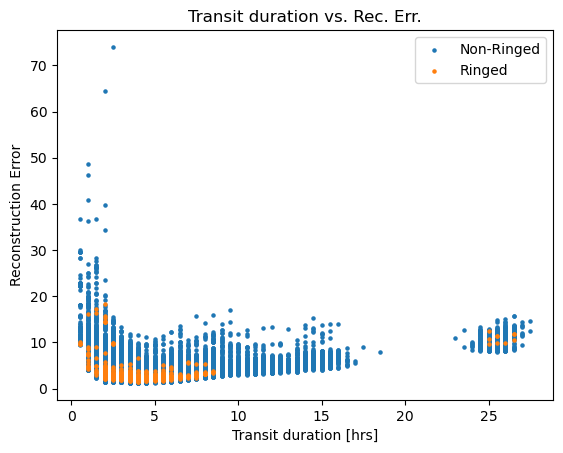

In [111]:
pl.scatter(non_ringed_durations_test, non_ringed_rec_err, s=5, label='Non-Ringed')
pl.scatter(ringed_durations, ringed_rec_err, s=5, label='Ringed')
pl.title('Transit duration vs. Rec. Err.')
pl.xlabel('Transit duration [hrs]')
pl.ylabel('Reconstruction Error')
pl.legend()
pl.savefig('Figs/transit-duration-vs-rec-err.png')
pl.show()

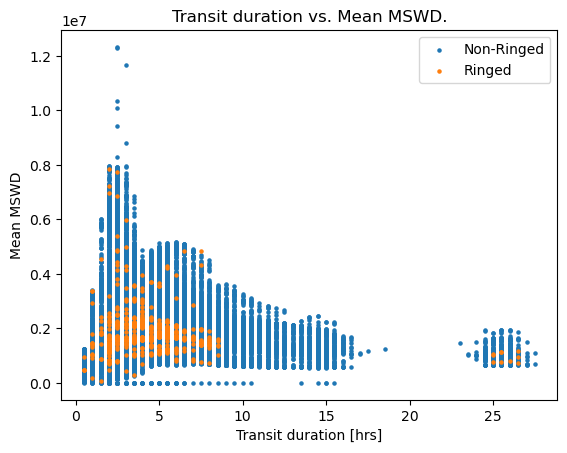

In [108]:
pl.scatter(non_ringed_durations_test, mean_MSWD_non_ringed, s=5, label='Non-Ringed')
pl.scatter(ringed_durations, mean_MSWD_ringed, s=5, label='Ringed')
pl.title('Transit duration vs. Mean MSWD.')
pl.xlabel('Transit duration [hrs]')
pl.ylabel('Mean MSWD')
pl.legend()
pl.savefig('Figs/transit_duration-vs-mean-MSWD.png')
pl.show()

In [120]:
import LCUtils_copy as LCU

In [145]:
non_ringed_unnormalized_curves_test = []

for i in range(test_non_ringed_curves.shape[0]):
    non_ringed_unnormalized_curves_test.append((test_non_ringed_curves[i, :, 0]*non_ringed_test_stds[i]) + non_ringed_test_medians[i])
    
ringed_unnormalized_curves = []

for i in range(test_ringed_curves.shape[0]):
    ringed_unnormalized_curves.append((test_ringed_curves[i, :, 0]*ringed_stds[i]) + ringed_medians[i])
    

non_ringed_unnormalized_curves_test = np.vstack(non_ringed_unnormalized_curves_test)
ringed_unnormalized_curves = np.vstack(ringed_unnormalized_curves)

In [146]:
non_ringed_transit_starts = LCU.get_transit_start(non_ringed_unnormalized_curves_test, 1800)
ringed_transit_starts = LCU.get_transit_start(ringed_unnormalized_curves, 1800)

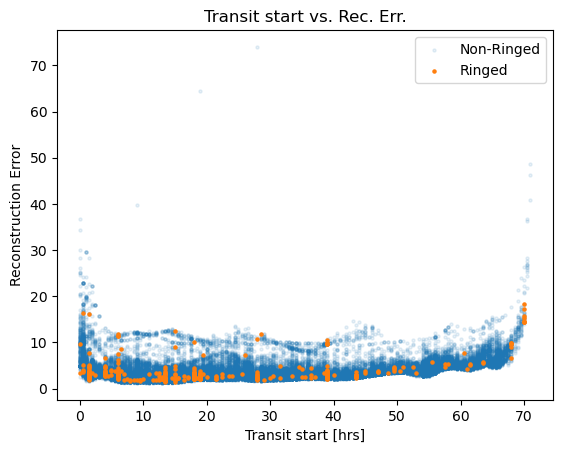

In [155]:
pl.scatter(non_ringed_transit_starts, non_ringed_rec_err, s=5, label='Non-Ringed', alpha=0.1)
pl.scatter(ringed_transit_starts, ringed_rec_err, s=5, label='Ringed')
pl.title('Transit start vs. Rec. Err.')
pl.xlabel('Transit start [hrs]')
pl.ylabel('Reconstruction Error')
pl.legend()
pl.savefig('Figs/transit-start-vs-rec-err.png')
pl.show()

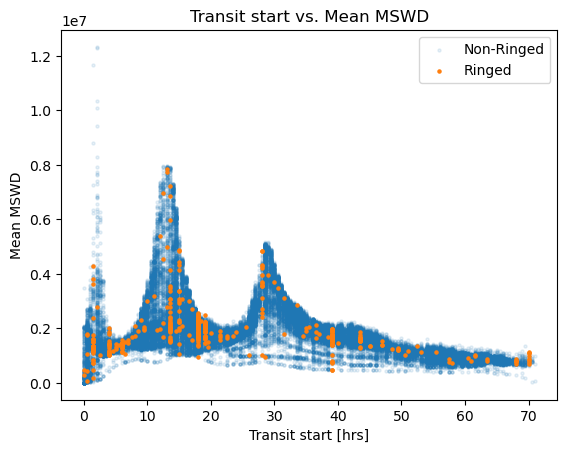

In [154]:
pl.scatter(non_ringed_transit_starts, mean_MSWD_non_ringed, s=5, label='Non-Ringed', alpha=0.1)
pl.scatter(ringed_transit_starts, mean_MSWD_ringed, s=5, label='Ringed')
pl.title('Transit start vs. Mean MSWD')
pl.xlabel('Transit start [hrs]')
pl.ylabel('Mean MSWD')
pl.legend()
pl.savefig('Figs/transit-start-vs-mean-MSWD.png')
pl.show()

In [158]:
train_non_ringed_curves = non_ringed_curves[:index_2_thirds]
non_ringed_durations_train = non_ringed_durations[non_ringed_transit_masks][non_ringed_shuffled_indices][:index_2_thirds]

(130459,)

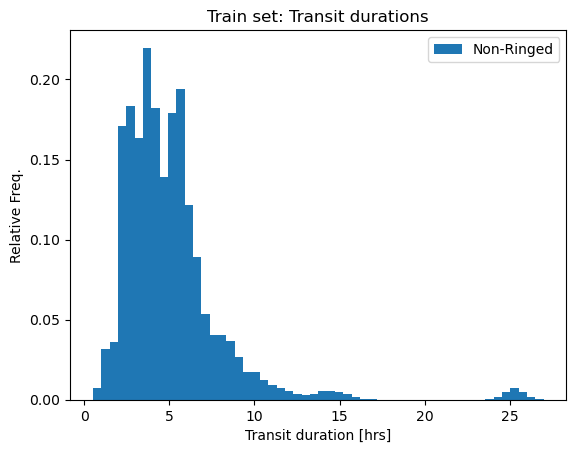

In [196]:
pl.hist(non_ringed_durations_train, density=True, bins=int(np.max(non_ringed_durations_train)*2), label='Non-Ringed')
pl.title('Train set: Transit durations')
pl.xlabel('Transit duration [hrs]')
pl.ylabel('Relative Freq.')
pl.legend()
pl.savefig('Figs/train-set-transit-durations.png')
pl.show()

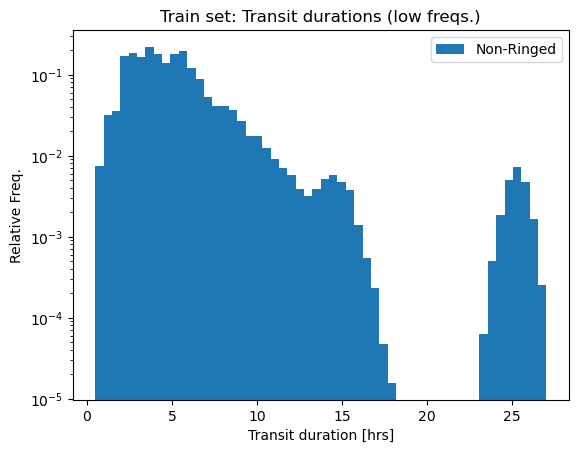

In [197]:
pl.hist(non_ringed_durations_train, density=True, bins=int(np.max(non_ringed_durations_train)*2), label='Non-Ringed')
pl.title('Train set: Transit durations (low freqs.)')
pl.xlabel('Transit duration [hrs]')
pl.ylabel('Relative Freq.')
pl.yscale('log')
pl.legend()
pl.savefig('Figs/train-set-transit-durations-low-freq.png')
pl.show()

In [170]:
non_ringed_train_medians = np.loadtxt('non-ringed-shuffled-medians.txt')[:index_2_thirds]
non_ringed_train_stds = np.loadtxt('non-ringed-shuffled-stds.txt')[:index_2_thirds]



In [176]:
non_ringed_unnormalized_curves_train = []

for i in range(train_non_ringed_curves.shape[0]):
    non_ringed_unnormalized_curves_train.append((train_non_ringed_curves[i, :]*non_ringed_train_stds[i]) + non_ringed_train_medians[i])
    
non_ringed_unnormalized_curves_train = np.vstack(non_ringed_unnormalized_curves_train)

In [177]:
train_non_ringed_transit_starts = LCU.get_transit_start(non_ringed_unnormalized_curves_train, 1800)

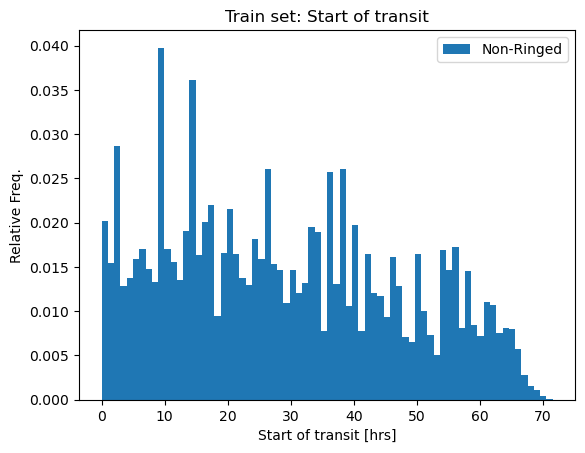

In [198]:
pl.hist(train_non_ringed_transit_starts, bins=72, label='Non-Ringed', density=True)
pl.title('Train set: Start of transit')
pl.xlabel('Start of transit [hrs]')
pl.ylabel('Relative Freq.')
pl.legend()
pl.savefig('Figs/train-set-start-of-transit.png')
pl.show()


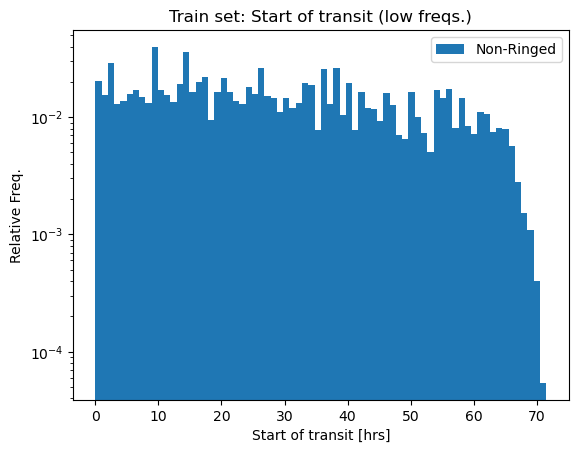

In [199]:
pl.hist(train_non_ringed_transit_starts, bins=72, label='Non-Ringed', density=True)
pl.title('Train set: Start of transit (low freqs.)')
pl.xlabel('Start of transit [hrs]')
pl.ylabel('Relative Freq.')
pl.yscale('log')
pl.legend()
pl.savefig('Figs/train-set-start-of-transit-low-freq.png')
pl.show()
